In [162]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm 
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
from sklearn.decomposition import PCA

In [163]:
df=pd.read_csv("diabetes.csv")
df.shape
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [164]:
df.groupby("Outcome").mean()
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [165]:
x=df.drop(columns="Outcome",axis=1)
y=df["Outcome"]

In [166]:
scaler=StandardScaler()
scaler.fit(x)
Scaled_x=scaler.transform(x)
x=Scaled_x

In [167]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=123)


In [173]:
classifier=svm.SVC(kernel="rbf")
classifier.fit(x_train,y_train)

SVC()

In [174]:
#checking train  data
prediction=classifier.predict(x_train)
accuracy=accuracy_score(prediction,y_train)
accuracy

0.8208469055374593

In [175]:
#checking test data
prediction=classifier.predict(x_test)
accuracy=accuracy_score(prediction,y_test)
accuracy

0.7727272727272727

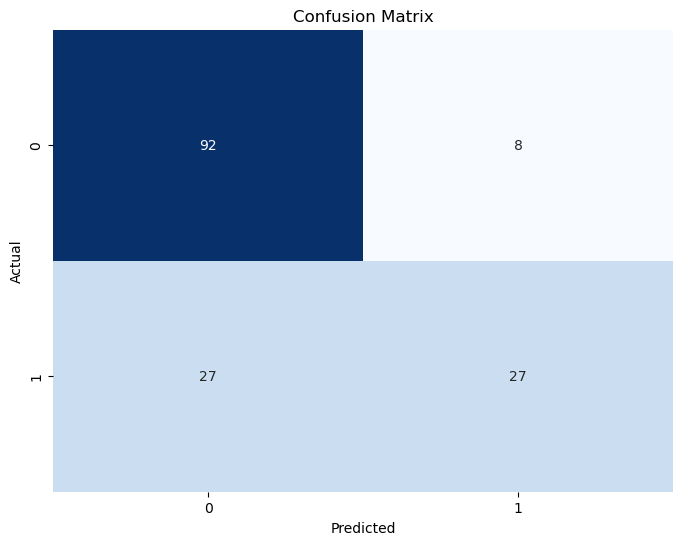

In [171]:


cm = confusion_matrix(y_test, prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

